<a href="https://colab.research.google.com/github/NamiraAidaHairunnisa/posttest2_DATAMINING/blob/main/2109116048_Namira_Aida_Hairunnisa_DATMIN_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

Import data ke dataframe

In [53]:
import pandas as pd
df1 = pd.read_excel('datasetmarket.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Menampilkan data 

In [54]:
df1

,whole milk,pastry,salty snack,sausage,semi- finished bread,yogurt,soda,pickled vegetables,canned beer,misc beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Menghitung total dari tiap item

In [55]:
df1.sum()

whole milk              5
pastry                  1
salty snack             1
sausage                 4
semi- finished bread    1
yogurt                  1
soda                    3
pickled vegetables      1
canned beer             1
misc beverages          1
hygiene articles        1
rolls/buns              3
frankfurter             2
whipped/sour cream      1
curd                    1
beef                    1
white bread             1
butter                  1
frozen vegetables       1
other vegetables        1
tropical fruit          1
sugar                   1
butter milk             1
specialty chocolate     1
frozen meals            1
dental care             1
root vegetables         1
detergent               1
dish cleaner            1
cling film/bags         1
dtype: int64

Menampilkan kolom yang ada

In [56]:
df1.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi- finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc beverages', 'hygiene articles', 'rolls/buns', 'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

menentukan kombinasi barang yang mungkin dapat terjadi

In [57]:
from itertools import permutations #library
comball = list(permutations(df1.columns,2)) #menyimpan kombinasi barang
comball #menampilkan

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi- finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

Menentukan kombinasi item yang ada

In [58]:
hasil = [] #menyimpan data dalam bentuk list
for combtem in comball: #perulangan  dataset
#mengetahui kombinasi tersebut ada atau tidak
  if len(df1[(df1[combtem[0]]==1) & (df1[combtem[1]]==1)]) >0:
    #menyimpan hasil  dalam bentuk tuple dalam list
    hasil.append(combtem) 
hasil

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi- finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi- finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi- finished bread', 'whole milk'),
 ('semi- finished bread', 'sausage'),
 ('semi- finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi- finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc beverages'),
 ('misc beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('r

Menghitung jumlah kombinasi tiap itemset

In [59]:
hasil_akhir ={} #menyimpan data dalam dictionary

#perulangan
for setitem in hasil:
  banyak_data=len(df1[
      (df1[setitem[0]]==1) & (df1[setitem[1]]==1)
      ])
  hasil_akhir[str(setitem)] = banyak_data
hasil_akhir

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi- finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi- finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi- finished bread', 'whole milk')": 1,
 "('semi- finished bread', 'sausage')": 1,
 "('semi- finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi- finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 

Menghitung support

In [60]:
#perulangan membaca pada setiap kombinasi
for item,ab in hasil_akhir.items():
  
    #melakukan pengitungan suport pada setiap kombinasi
    support = ab/len(df1)*100
    print(f"{item} support = {support:.3f}%")

('whole milk', 'pastry') support = 5.263%
('whole milk', 'salty snack') support = 5.263%
('whole milk', 'sausage') support = 10.526%
('whole milk', 'semi- finished bread') support = 5.263%
('whole milk', 'yogurt') support = 5.263%
('whole milk', 'soda') support = 5.263%
('whole milk', 'rolls/buns') support = 5.263%
('whole milk', 'butter') support = 5.263%
('pastry', 'whole milk') support = 5.263%
('pastry', 'salty snack') support = 5.263%
('salty snack', 'whole milk') support = 5.263%
('salty snack', 'pastry') support = 5.263%
('sausage', 'whole milk') support = 10.526%
('sausage', 'semi- finished bread') support = 5.263%
('sausage', 'yogurt') support = 5.263%
('sausage', 'hygiene articles') support = 5.263%
('sausage', 'rolls/buns') support = 10.526%
('semi- finished bread', 'whole milk') support = 5.263%
('semi- finished bread', 'sausage') support = 5.263%
('semi- finished bread', 'yogurt') support = 5.263%
('yogurt', 'whole milk') support = 5.263%
('yogurt', 'sausage') support = 5.

Menghitung Confidence

In [61]:
#  perulangan pembacaan dataset tiap kombinasi itemnya
for item,ab in hasil_akhir.items(): 
  i = eval(item) 
  confidence = ab/df1[i[0]].sum()*100 
  print(f"{i[0]}->{i[1]}  Confidence = {confidence:.1f}%") 

whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi- finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi- finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi- finished bread->whole milk  Confidence = 100.0%
semi- finished bread->sausage  Confidence = 100.0%
semi- finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi- finished bread  Confidence = 100.0%
soda-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

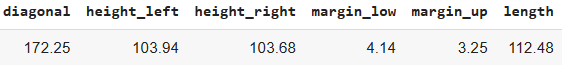
<!-- 1412 -->

Impor dataset ke dataframe



In [62]:
df2 = pd.read_csv('deteksi_uang_palsu.csv')

Menampilkan dataframe ke dalam bentuk tabel

In [63]:
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


Buat tabel jarak berdasarkan data yang baru ditambahkan

In [64]:
import numpy as np

#membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})
#menghitung jarak antara baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


In [65]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [66]:
#menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

#mengatur lebar tabel
pd.set_option('display.width', 150)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [67]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [68]:
sorted = df2.sort_values('distance') #mengurutkan data kecil ke besar
k = int(np.sqrt(len(df2))) #menentukan nilai-k

#menentukan data terdekat
data_terdekat = sorted.head(k)
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [69]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [70]:
from sklearn.neighbors import KNeighborsClassifier

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya: True \n")

#bagi data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

#inisiasi data baru menjadi data tes
coba_data = new_data

#membuat variabel KNN yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
KNN = KNeighborsClassifier(n_neighbors=k)

#melatih KNN dengan data training
KNN.fit(X_train, y_train)

#memprediksi hasil
prediksi = KNN.predict(coba_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, maka hasilnya: "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya: True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, maka hasilnya: True


# (3) Analisis

> Nama : Namira Aida Hairunnisa

> Nim : 2109116048


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. **Pendidkan**

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding

School Dataset berisikan tahun, tingkat, jenis, dan jumlah sekolah, guru, murid, dan kelas yang ada di Indonesia dari tahun 2011 - 2016. Tujuannya adalah untuk memberikan informasi mengenai situasi pendidikan di Indonesia dalam jangka waktu 5 tahun. Dataset ini dapat memberikan wawasan/pandangan mengenai perkembangan sekolah yang ada di Indonesia dan perbandingan dengan tahun sebelumnya. 

Dalam hal bisnis, dataset ini dapat membantu pihak pemerintah dan yayasan pendidikan untuk memperkirakan berapa jumlah sekolah, guru, murid, & ruang kelas di masa yang akan datang & merencanakan strategi bisnis yang tepat untuk dapat memenuhi kebutuhan tersebut. Selain itu, dataset ini juga dapat membantu yayasan pendidikan untuk memahami serta memperkirakan potensi bisnis di pasar pendidikan Indonesia

## Data Understanding

**Collect Initial Data**

Dataset kaggle:
https://www.kaggle.com/datasets/smeilisa07/number%20of%20school%20teacher%20student%20class?resource=download&select=jumlah-sekolah-guru-murid-dan-ruang-kelas-menurut-jenis-sekolah-2011-2016.csv

Dataset CSV:
https://drive.google.com/file/d/19hHvKeyRh8QJT1GPYQGZ4Gp4QNlem2eo/view?usp=sharing

In [71]:
import pandas as pd
df3 = pd.read_csv('school dataset.csv')

**Describe Data**

Dataset ini berisikan informasi mengenai tahun, tingkat, jenis, dan jumlah sekolah, guru, murid, dan kelas menurut jenis sekolah di Indonesia dari tahun 2011 - 2016. Dataset ini mencakup informasi tentang Taman Kanak - kanak (TK), Sekolah Dasar (SD), Sekolah Menengah Pertama (SMP), Sekolah Menengah Atas (SMA), dan Sekolah Menengah Kejuruan (SMK).

Setiap baris dalam dataset mewakili jumlah sekolah, guru, murid, dan kelas yang ada di setiap jenis sekolah pada tahun tertentu. Dataset ini terdiri dari 7 kolom, yaitu "tahun", "tingkat_sekolah", "jenis_sekolah", "jumlah_sekolah", "jumlah_guru", "jumlah_murid", dan "jumlah_kelas"

In [72]:
print("Daftar kolom:")

for col in df3.columns:
  print(col)

Daftar kolom:
tahun
tingkat_sekolah
jenis_sekolah
 jumlah_sekolah 
 jumlah_guru 
 jumlah_murid 
 jumlah_kelas 


**Penjelasan Kolom**

1. tahun: kolom ini menyatakan tahun data diambil, yaitu 2011-2016.

2. tingkat_sekolah: kolom ini menyatakan tingkatan sekolah yaitu TK (Taman Kanak-kanak), SD (Sekolah Dasar), SMP (Sekolah Menengah Pertama), SMA (Sekolah Menengah Atas), dan SMK (Sekolah Menengah Kejuruan).

3. jenis_sekolah: kolom ini menyatakan jenis sekolah, yaitu SD (Sekolah Dasar), SMP (Sekolah Menengah Pertama), SMA (Sekolah Menengah Atas), SMK (Sekolah Menengah Kejuruan).

4. jumlah_sekolah: kolom ini menyatakan jumlah sekolah pada setiap tingkat & jenis sekolah disetiap tahunnya.

5. jumlah_guru: kolom ini menyatakan jumlah guru pada setiap tingkat & jenis sekolah disetiap tahunnya.

6. jumlah_murid: kolom ini menyatakan jumlah murid pada setiap tingkat & jenis sekolah disetiap tahunnya.

7. jumlah_kelas: kolom ini menyatakan jumlah kelas pada setiap tingkat & jenis sekolah disetiap tahunnya.

**Explore Data**

Beberapa kolom data akan divisualisasikan menggunakan scatterplot dan barplot

Pada barplot, beberapa kolom akan dibandingkan secara satu - persatu dengan kolom tingkat sekolah untuk melihat apakah hubungan antara kolom - kolom ini berbanding lurus dengan kolom tingkat sekolah atau sebaliknya

In [73]:
import seaborn as sns
import matplotlib.pyplot as plot

<Axes: xlabel='tingkat_sekolah', ylabel=' jumlah_sekolah '>

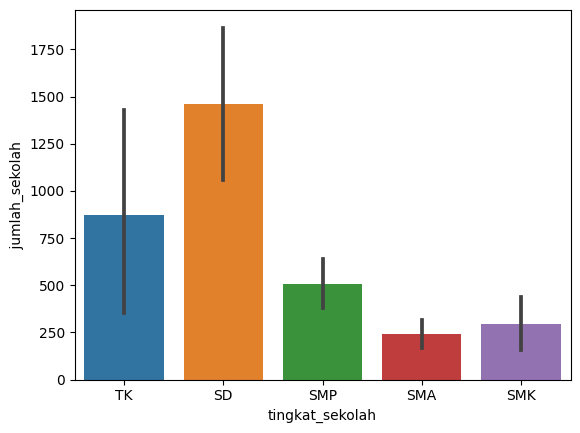

In [74]:
sns.barplot(data=df3, x='tingkat_sekolah',y=" jumlah_sekolah ")

Dalam visualisasi ini, sumbu x dan y masing-masing mewakili variabel "tingkat_sekolah" dan "jumlah_sekolah". Sehingga, kita dapat melihat jumlah sekolah di berbagai tingkat sekolah di Indonesia. Misalnya, kita dapat melihat berapa banyak sekolah yang ada di tingkat sekolah dasar (SD), sekolah menengah pertama (SMP), dan sekolah menengah atas (SMA) di Indonesia pada periode waktu yang sama.

Didapati bahwasanya data tertinggi berada pada tingkat sekolah SD dengan jumlah hampir 1500 sekolah dan data terendah berada pada tingkat SMA dengan jumlah kurang dari 250 sekolah.

Dengan visualisasi ini, kita dapat memperoleh pemahaman yang lebih baik tentang distribusi data dan perbandingan jumlah sekolah di berbagai tingkat sekolah di Indonesia dan dapat digunakan sebagai dasar untuk membuat prediksi atau menarik kesimpulan tentang kondisi pendidikan di Indonesia.

<Axes: xlabel='tingkat_sekolah', ylabel=' jumlah_murid '>

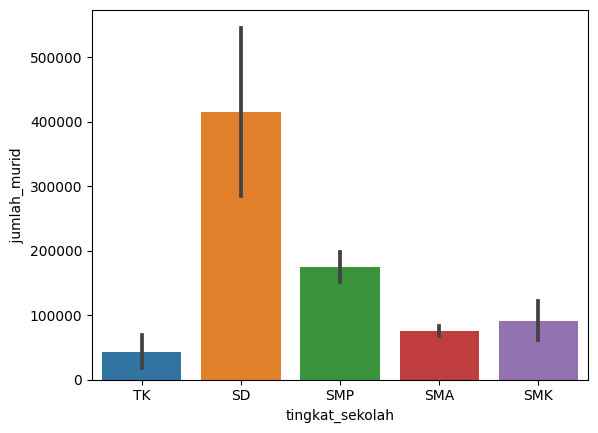

In [75]:
sns.barplot(data=df3,x='tingkat_sekolah',y=" jumlah_murid ")

Dalam visualisasi ini, sumbu x dan y masing-masing mewakili variabel "tingkat_sekolah" dan "jumlah_murid". Sehingga, kita dapat melihat jumlah murid di berbagai tingkat sekolah di Indonesia. Misalnya, kita dapat melihat berapa banyak murid yang belajar di sekolah dasar (SD), sekolah menengah pertama (SMP), dan sekolah menengah atas (SMA) di Indonesia pada periode waktu yang sama.

Didapati bahwa jumlah murid tertinggi berada pada tingkat sekolah SD dengan total > 40.000 murid dan jumlah murid terendah berada pada tingkat sekolah TK dengan total < 10.000 murid.

Dengan visualisasi ini, kita dapat memperoleh pemahaman yang lebih baik tentang distribusi data dan perbandingan jumlah murid di berbagai tingkat sekolah di Indonesia dan dapat digunakan sebagai dasar untuk membuat prediksi atau menarik kesimpulan tentang kondisi pendidikan di Indonesia.

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


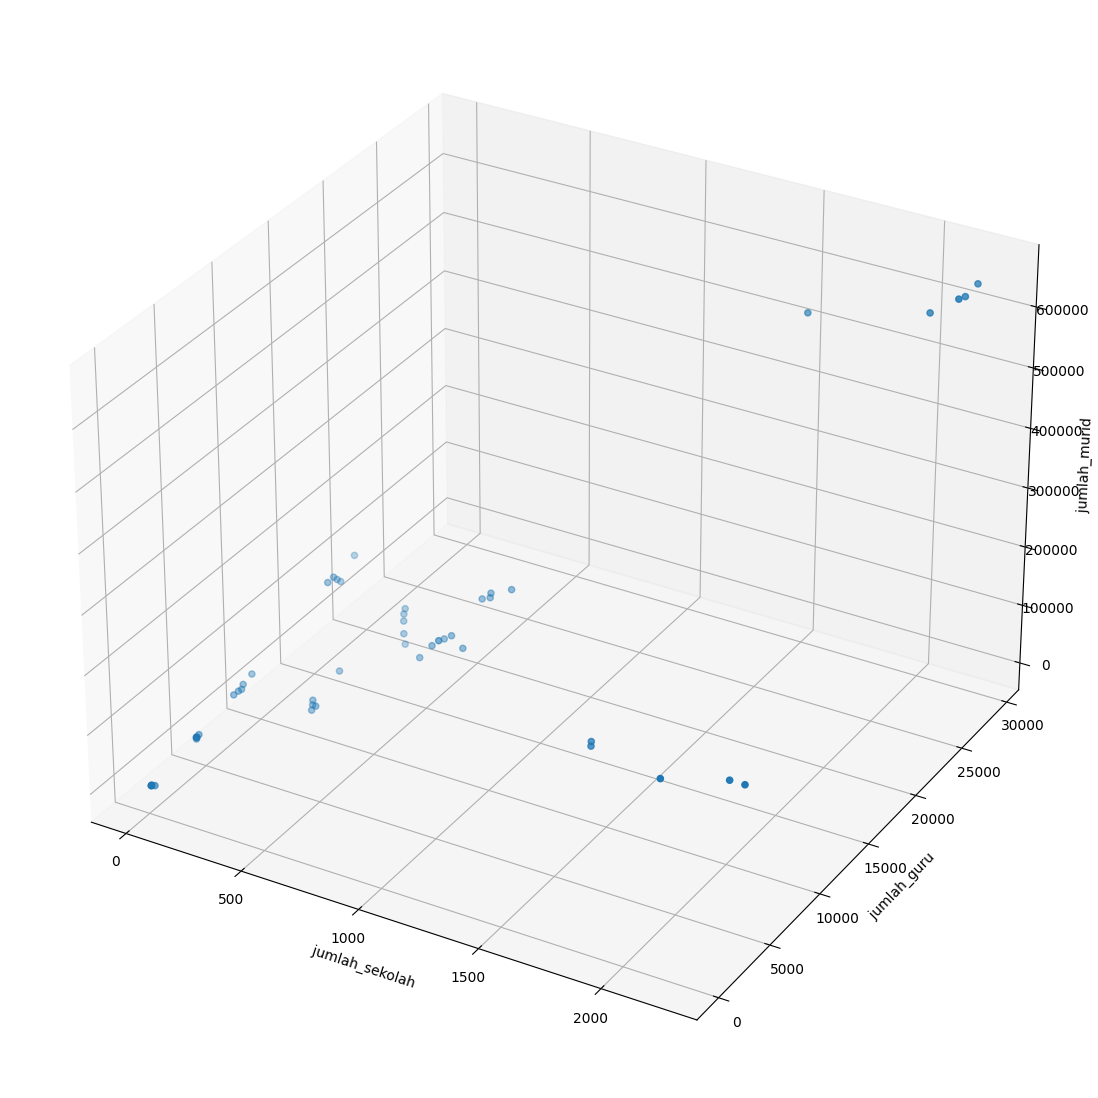

In [76]:
plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3[' jumlah_sekolah '],df3[' jumlah_guru '],df3[' jumlah_murid '])

axes.set_xlabel(' jumlah_sekolah ')
axes.set_ylabel(' jumlah_guru ')
axes.set_zlabel(' jumlah_murid ')
plot.show()

Dalam visualisasi ini, sumbu x, y, dan z masing-masing mewakili variabel "jumlah_sekolah", "jumlah_guru", dan "jumlah_murid". Sehingga, kita dapat melihat bagaimana ketiga variabel ini berkorelasi satu sama lain. Misalnya, kita dapat melihat apakah peningkatan jumlah sekolah juga berdampak pada peningkatan jumlah murid atau guru di sekolah-sekolah tersebut, dan sebaliknya.

Dengan visualisasi ini, kita dapat memperoleh pemahaman yang lebih baik tentang distribusi data dan korelasi antara variabel-variabel ini dan dapat digunakan sebagai dasar untuk membuat prediksi atau menarik kesimpulan tentang kondisi pendidikan di Indonesia.

**Verify Data Quality**

Melakukan verifikasi data dengan memeriksa data berdasarkan pada indikator kualitas data

Validitas Data

Data - data yang tercakup pada dataframe di atas ialah **valid**, dataset tersebut memiliki sumber data dari website jakarta.go.id , sehingga dapat dikatakan memiliki validitas sumber data yang baik. 

Dataset on kaggle:
https://www.kaggle.com/datasets/smeilisa07/number%20of%20school%20teacher%20student%20class?resource=download&select=jumlah-sekolah-guru-murid-dan-ruang-kelas-menurut-jenis-sekolah-2011-2016.csv

Duplikasi data

In [77]:
coba_duplicated = df3.duplicated().any()
print("status Duplikasi :",coba_duplicated)

status Duplikasi : False


Dapat disimpulkan bahwa DataFrame df3 tidak memiliki nilai yang duplikat. Proses pengecekan ini dilakukan dengan menggunakan fungsi df3.duplicated(), yang menghasilkan array boolean yang menunjukkan apakah setiap baris di DataFrame memiliki nilai yang sama dengan baris lain atau tidak.

Kemudian, digunakan fungsi .any() untuk memeriksa apakah ada nilai yang duplikat dalam DataFrame. Jika output yang dihasilkan adalah False, maka dapat disimpulkan bahwa tidak ada baris dalam DataFrame df3 yang memiliki nilai yang sama dengan baris lain, sehingga dapat disimpulkan bahwa DataFrame tersebut tidak memiliki nilai duplikat.

Dengan mengetahui bahwa DataFrame df3 tidak memiliki nilai duplikat, maka kita dapat memastikan bahwa setiap baris pada DataFrame tersebut merepresentasikan data yang unik dan valid. Hal ini akan sangat penting dalam memastikan kualitas data yang akan digunakan dalam analisis dan pemodelan.

# Data Preparation

**Select Data**

In [78]:
df3 = pd.read_csv('school dataset.csv')

**Clean Data**

In [79]:
df3.isna().sum()

tahun               0
tingkat_sekolah     0
jenis_sekolah       0
 jumlah_sekolah     0
 jumlah_guru        0
 jumlah_murid       0
 jumlah_kelas       0
dtype: int64

Dari output yang diberikan, dapat dilihat bahwa tidak ada missing values pada DataFrame df3. Untuk memastikan hal ini, digunakan fungsi df3.isna() yang akan menghasilkan array boolean yang menunjukkan apakah setiap elemen di DataFrame merupakan nilai yang hilang atau tidak.

Kemudian, dilakukan penghitungan jumlah nilai yang hilang pada setiap kolom menggunakan fungsi .sum(). Jika output yang dihasilkan adalah 0 untuk setiap kolom, maka dapat disimpulkan bahwa tidak ada nilai yang hilang pada DataFrame df3.

Dengan demikian, dapat disimpulkan bahwa DataFrame df3 tidak memiliki nilai yang hilang pada setiap kolomnya.

**Transform Data**

In [80]:
df3 = pd.get_dummies(df3)
print(df3)

     jumlah_sekolah    jumlah_guru    jumlah_murid    jumlah_kelas   tahun_2011-2012  tahun_2012-2013  tahun_2013-2014  tahun_2014-2015  \
0                  9             58             521              35                1                0                0                0   
1               1781           8646           92775            5179                1                0                0                0   
2                  9             58             673              35                0                1                0                0   
3               1432          10064           81050            4524                0                1                0                0   
4                  9            103             836              35                0                0                1                0   
5               1421          10346           82874            4604                0                0                1                0   
6                  9       

Fungsi pd.get_dummies digunakan untuk mengubah data kategorikal yang disimpan dalam dataframe df3 menjadi bentuk dummy variabel. Dummy variabel mengkonversi variabel kategori menjadi variabel biner 0 dan 1, yang memudahkan pengolahan data dalam model machine learning.

Setelah mengubah data kategorikal menjadi bentuk dummy variabel, hasilnya ditampilkan pada layar menggunakan fungsi print untuk memastikan transformasi data telah berhasil.

Dengan menggunakan dummy variabel, kita dapat memperoleh representasi numerik dari variabel kategorikal, sehingga dapat digunakan dalam analisis dan pemodelan data.

**Split Data**

In [81]:
from sklearn.model_selection import train_test_split
x = df3.drop(' jumlah_kelas ',axis=1)
y = df3[' jumlah_kelas ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

     jumlah_sekolah    jumlah_guru    jumlah_murid   tahun_2011-2012  tahun_2012-2013  tahun_2013-2014  tahun_2014-2015  tahun_2015-2016  \
6                  9             70             540                0                0                0                1                0   
41               517          12789          161217                1                0                0                0                0   
46                63           3080           40597                0                0                0                1                0   
47               536          12334          109932                0                0                0                1                0   
15               839          13894          208064                0                0                1                0                0   
9               2056          10391           88214                0                0                0                0                1   
16              2111

Terlihat bahwa variabel yang digunakan sebagai fitur (x) adalah data pada kolom kecuali kolom 'jumlah_kelas', sedangkan variabel yang digunakan sebagai target (y) adalah data pada kolom 'jumlah_kelas'.

Selanjutnya, data dibagi menjadi data latih (train) dan data uji (test) dengan perbandingan 70:30. Data latih (x_train dan y_train) akan digunakan untuk melatih model, sedangkan data uji (x_test dan y_test) akan digunakan untuk mengevaluasi performa model.